# Задача 5.2
Выборка: https://www.kaggle.com/datasets/rtatman/speech-accent-archive

Требуется:

Отобрать записи, соответствующие странам с минимум 30 респонеднтами в выборке
Получить сумму zero-crossing по каждой из записей
Провести ANOVA-анализ по аттрибутам родного языка, пола и возраста для уровня значимости 0.15. Дискретность признака zero-crossing игнорировать.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import librosa
import librosa.display as disp
from librosa import display
from tqdm import tqdm
from statsmodels.stats.diagnostic import kstest_normal
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.weightstats import ztest
from statsmodels.stats.proportion import binom_test
from statsmodels.stats.proportion import proportion_confint
from statsmodels.stats.proportion import binom_test, proportions_ztest, proportions_chisquare
from statsmodels.distributions.empirical_distribution import ECDF

Во-первых , отберем записи, соответствующие странам с минимум 30 респонеднтами в выборке.

In [2]:
dirpath = r'C:\Users\artyg\Downloads\recordings'
nations = set()
for (dirpath, dirnames, filenames) in os.walk(dirpath):
    for file in filenames:
        if '30' in file:
            #print(file)
            nation = re.sub(r"\d+", "", os.path.splitext(file)[0], flags=re.UNICODE)
            #print(nation)
            nations.add(nation)
print(nations)

{'german', 'russian', 'polish', 'french', 'dutch', 'italian', 'turkish', 'korean', 'arabic', 'portuguese', 'english', 'spanish', 'mandarin'}


Далее преобразуем аудиофайлы выбранных стран в формат wav, посчитаем zero-crossing и сразу будем формировать датасет.

In [3]:
data = pd.DataFrame(columns=['nation', 'zero-crossing'])
for (dirpath, dirnames, filenames) in os.walk(dirpath):
    for file in filenames:
        for nation in nations:
            if nation in file:
                name = os.path.splitext(file)[0]
                !sox "{dirpath}\{name}.mp3" "{dirpath}\{name}.wav"
                x, sr = librosa.load(f"{dirpath}\\{name}.wav")
                zero_crossings = librosa.zero_crossings(x, pad=False)
                row = {'nation': nation, 'zero-crossing': sum(zero_crossings)}
                data = data.append(row, ignore_index = True)

sox WARN sox: `C:\Users\artyg\Downloads\recordings\english154.wav' output clipped 1 samples; decrease volume?
sox WARN sox: `C:\Users\artyg\Downloads\recordings\english154.wav' output clipped 1 samples; decrease volume?
sox WARN sox: `C:\Users\artyg\Downloads\recordings\english265.wav' output clipped 2 samples; decrease volume?
sox WARN sox: `C:\Users\artyg\Downloads\recordings\english360.wav' output clipped 2 samples; decrease volume?
sox WARN sox: `C:\Users\artyg\Downloads\recordings\portuguese20.wav' output clipped 1 samples; decrease volume?


In [4]:
data.to_csv('data5.csv')

In [5]:
data = pd.read_csv('data5.csv')
data = data.drop(columns=['Unnamed: 0'])
data

,nation,zero-crossing
0,arabic,99560
1,arabic,99560
2,arabic,91024
3,arabic,91024
4,arabic,117862
...,...,...
1522,turkish,65407
1523,turkish,42478
1524,turkish,83565
1525,turkish,93313


In [6]:
data.describe(include='all')

,nation,zero-crossing
count,1527,1527.000000
unique,13,NaN
top,english,NaN
freq,651,NaN
mean,NaN,79645.356909
std,NaN,32309.004642
min,NaN,9940.000000
25%,NaN,58491.500000
50%,NaN,73567.000000
75%,NaN,94981.500000


In [7]:
dic = dict()
for nation in nations:
    dic[nation] = []
dic

{'german': [],
 'russian': [],
 'polish': [],
 'french': [],
 'dutch': [],
 'italian': [],
 'turkish': [],
 'korean': [],
 'arabic': [],
 'portuguese': [],
 'english': [],
 'spanish': [],
 'mandarin': []}

In [8]:
for i in range(len(data)):
    dic[data.loc[i]['nation']].append(data.loc[i]['zero-crossing'])
dic

{'german': [40795,
  49082,
  49631,
  64282,
  60455,
  46681,
  62278,
  65995,
  56815,
  109456,
  41539,
  44570,
  79667,
  46064,
  76324,
  79164,
  44356,
  60286,
  106921,
  84770,
  59140,
  76191,
  55117,
  78225,
  76784,
  83735,
  107385,
  58265,
  88467,
  80688,
  56105,
  113512,
  52926,
  66538,
  22874,
  104230],
 'russian': [99275,
  31298,
  74109,
  109798,
  31285,
  73330,
  63296,
  71078,
  64188,
  50760,
  31835,
  102743,
  50485,
  58505,
  55197,
  61132,
  126777,
  100488,
  85452,
  90699,
  45718,
  86392,
  86204,
  56601,
  61389,
  91204,
  93557,
  81340,
  150874,
  122406,
  45161,
  127882,
  96078,
  194757,
  43365,
  89960,
  93255,
  101473,
  48682,
  92838,
  90477,
  85357,
  62859,
  88734,
  118061,
  109913,
  140708,
  15979],
 'polish': [58092,
  97400,
  44347,
  70694,
  65036,
  92891,
  66596,
  59808,
  123317,
  55152,
  41684,
  115171,
  118008,
  73327,
  126674,
  50410,
  86326,
  70694,
  95734,
  106564,
  60692,


In [9]:
zero_cros = []
for nation in dic.keys():
    zero_cros.append(dic[nation])
zero_cros

[[40795,
  49082,
  49631,
  64282,
  60455,
  46681,
  62278,
  65995,
  56815,
  109456,
  41539,
  44570,
  79667,
  46064,
  76324,
  79164,
  44356,
  60286,
  106921,
  84770,
  59140,
  76191,
  55117,
  78225,
  76784,
  83735,
  107385,
  58265,
  88467,
  80688,
  56105,
  113512,
  52926,
  66538,
  22874,
  104230],
 [99275,
  31298,
  74109,
  109798,
  31285,
  73330,
  63296,
  71078,
  64188,
  50760,
  31835,
  102743,
  50485,
  58505,
  55197,
  61132,
  126777,
  100488,
  85452,
  90699,
  45718,
  86392,
  86204,
  56601,
  61389,
  91204,
  93557,
  81340,
  150874,
  122406,
  45161,
  127882,
  96078,
  194757,
  43365,
  89960,
  93255,
  101473,
  48682,
  92838,
  90477,
  85357,
  62859,
  88734,
  118061,
  109913,
  140708,
  15979],
 [58092,
  97400,
  44347,
  70694,
  65036,
  92891,
  66596,
  59808,
  123317,
  55152,
  41684,
  115171,
  118008,
  73327,
  126674,
  50410,
  86326,
  70694,
  95734,
  106564,
  60692,
  109950,
  72776,
  150446,
  

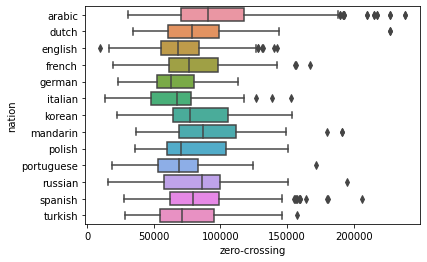

In [10]:
_ = sns.boxplot(x='zero-crossing', y='nation', data=data)
plt.show()

Альтернативная гипотеза не предполагает, что средние каким-то образом упорядочены, поэтому используем критерий Краскела-Уоллиса

In [11]:
st.kruskal(*zero_cros)

KruskalResult(statistic=138.59716130790036, pvalue=1.1493810432202807e-23)

Вывод : p-value очень маленькое, намного меньше 0.05, значит, мы отклоняем гипотезу о том, что национальность не влияет на zero-crossing